 # Social Media Analytics: Exploring Khan Academy's YouTube Data 

# Author: Demontray Lockhart
# Date: 4/15/2022

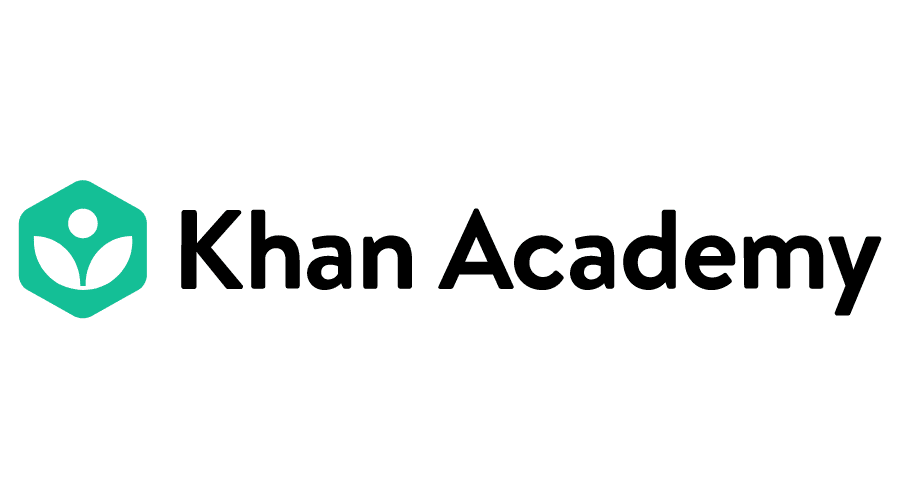

## INTRODUCTION

Khan Academy, an American-based non-profit educational organization, has a mission to provide a world-class education to anyone free of charge regardless of their location by utilizing online media such as YouTube. Salman Khan, the founder of Khan Academy, started posting YouTube videos in 2008 and in 2009 turned it into a full-time venture [1]. Its content has been used for open educational resources in different subjects, for example, Math and Science. Since 2022, Khan Academy has over 7 million subscribers and more than 1 billion video views.

With that amount of traffic, Khan Academy can explore its social media data to better understand the value its providing to its users and find additional ways to increase that value. Since math instructional videos are among its oldest and most viewed subject [2], we will analyze the course playlists of Calculus and Linear Algebra. And by exploring their unstructured data, we hope to glean insights for future learning resources and marketing strategies. 

The six phases of Google's *Data Analysis Process* is outlined below.

## PHASE 1: ASK

1.1 Business Task:<br>
    We use data from instructional YouTube videos to gain insights on successful videos and veiewers' attitude towards the content.
    
1.2 The business objective is to find patterns in Khan Academy's successful instructional YouTube videos by focusing on the following questions:<br>

    1. Is the number of liked videos important for more views?
    2. Is the duration of videos important for more views?
    3. Is the number of content words in comments important for more views?
    4. Which topics are popular across video playlists?
    5. Which words are more frequent across video playlists?
    6. Which of the frequent words express positive or negative sentiment?



1.3 Deliverables:<br>
- An outline of the business task <br>
- Description of data sources used<br>
- Data cleaning and transformation processes<br>
- Summary of analysis <br>
- Visualizations of findings<br>
- Actionable insights for improving learning resources and employing marketing strategies<br>
    
1.4 Stakeholders:<br>
- Salman Khan<br>
- Pixar<br>
- NASA<br>
- College Board<br>
- Teachers<br>
- Students<br>

## PHASE 2: PREPARE

Accessing Google's YouTube Data API, we extracted data and metadata of the two courses and then saved them into pandas DataFrames which were then saved as two comma seperated value (csv) files. These steps are omitted from the Process phase for sake of brevity. However, we also extracted textual data in the form of comments to explore viewers' opinions as an alternative to collecting attitudinal surveys [3]. This part is outlined in the Process phase.<br> 

For interfacing the YouTube API, we took the following steps:<br>
- First, with an existing Google account, we created a project through the Google Developers Console. 
- Second, we obtained credentials for an API key.
- Third, we enabled the interface to work with the client. Due to limitations on the amount of data that can be extracted (per API guideliness), the first 10 comments were pulled from each video in the playlists. 
- Fourth, we saved the unstructured data from each course in pandas DataFrames.

The two intiial csv files were merged with the concatenated DataFrame containing the comments from both courses. The data cleaning and transformation process will be illustrated below in the Process phase.

## PHASE 3: PROCESS

Python is being used to prepare and process the data.

**3.1 Preparing enviornment in jupyter notebook for data wranggling** <br>
Some importtant data wranggling libraries are `pandas, numpy, matplotlib, and seaborn`.

In [1]:
# Data wranggling libraries
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Google API
from googleapiclient.discovery import build

**3.2 Extracting and Importing datasets**<br>
Some important steps for accessing and extracting data through Google's YouTube API:<br>
- Get an api key
- Use googleapiclient module to build api client
- Get channel and playlist ids
- Create functions to access data from the ids

In [2]:
api_key = "[ADD API KEY HERE]"

channel_ids = ['UC4a-Gbdw7vOaccHmFo40b9g']

youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
def get_video_ids(youtube, playlist_id):
    """
    Get list of video IDs of all videos in the given playlist
    Params:
    
    youtube: the build object from googleapiclient.discovery
    playlist_id: playlist ID of the channel
    
    Returns:
    List of video IDs of all videos in the playlist
    
    """
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [4]:
def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and associated top level comment in text.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments) 

In [5]:
playlist_id = "PLFD0EB975BA0CC1E0" # linear algebra playist id

In [6]:
# Get video ids
video_ids = get_video_ids(youtube, playlist_id)

In [7]:
# Get video ids count
len(video_ids)

144

In [8]:
# Create a dataframe variable of video ids and comments
comments_df1 = get_comments_in_videos(youtube, video_ids)

# Check the first 5 rows of dataframe
comments_df1.head(5)

,video_id,comments
0,xyAuNHPsq-g,[Today k started this videos...every day i’ll ...
1,aKhhYguY0DQ,"[khan academy is my saviour, the depth of the ..."
2,OAh573i_qn8,[this video is helping me to pass my math cour...
3,iUQR0enP7RQ,"[You are a legend, as alawys, Your videos are ..."
4,S4n-tQZnU6o,"[time for a new video, My professor is giving ..."


In [9]:
playlist_id = "PL19E79A0638C8D449" # Calculus playlist id

In [10]:
# Get video ids
video_ids = get_video_ids(youtube, playlist_id)

In [11]:
# Get video ids count
len(video_ids)

199

In [12]:
# Create a dataframe variable of video ids and comments
comments_df2 = get_comments_in_videos(youtube, video_ids)

# Check the first 5 rows of dataframe
comments_df2.head(5)

,video_id,comments
0,EKvHQc3QEow,"[""OOH""sane Bolt lol \n\nMr Sal its u sane Bolt..."
1,riXcZT2ICjA,"[you like a teacher, Thanksss sal ⚡💕💕, why are..."
2,W0VWO4asgmk,"[Watching this after 14y of release, 5y after ..."
3,GGQngIp0YGI,"[I am watching it now lol, Those who found thi..."
4,YRw8udexH4o,"[Anyone in 2021 👋🏻, crazy how this is almost 1..."


After obtaining comments for both course playlists and saving them as dataframes, we do the following:<br>
- Concatenate the dataframes
- Confirm the correct number of rows, object types and null values

In [13]:
# Concatenate the two comments dataframes
frames = [comments_df1, comments_df2]
comments = pd.concat(frames, ignore_index=True)

In [14]:
# Check to see video ids and comments count
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  343 non-null    object
 1   comments  343 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


Our concatenated-comments dataframe seems approrpiate.<br>

However, before we can start inspecting the data, we need to merge comments dataframe with course dataframe using video ids.

In [15]:
# Read in csv file of courses into a dataframe
df = pd.read_csv("calculus_linear_algebra_courses.csv")

In [16]:
# Merge course dataframe with comments dataframe
final_df = df.merge(comments, left_on='video_id', right_on='video_id')

# Sample 5 rows
final_df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,comments
153,Ve99biD1KtA,Khan Academy,Proof: lim (sin x)/x | Limits | Differential C...,Using the squeeze theorem to prove that the li...,NaN,2008-06-25T03:58:28Z,1209493,4934,NaN,562,PT18M5S,sd,True,"[You left out the ""or equal to"" part on the in..."
159,HtvikVD9aa0,Khan Academy,Derivative intuition module | Taking derivativ...,Sal walking through the derivative intuition m...,NaN,2011-10-20T13:16:01Z,280261,580,NaN,25,PT3M58S,hd,True,[This made so many things clicked for me. Than...
262,85zGYB-34jQ,Khan Academy,Double integral 1 | Double and triple integral...,Introduction to the double integral\n\nWatch t...,NaN,2008-08-14T01:07:00Z,872271,4038,NaN,233,PT10M29S,sd,True,"[Sir you are human embodiment of God, very goo..."
7,gsNgdVdAT1o,Khan Academy,Matrices to solve a vector combination problem...,Using matrices to figure out if some combinati...,NaN,2008-06-14T18:18:30Z,314756,950,NaN,95,PT14M20S,sd,True,[the best explanations of the matrix math I ev...
23,PsNidCBr5II,Khan Academy,Vector triangle inequality | Vectors and space...,Proving the triangle inequality for vectors in...,NaN,2009-10-10T16:48:59Z,230266,582,NaN,25,PT18M53S,hd,True,[Just here after 11 year's to solve my present...


Since we have our final dataset, we can start cleaning and transforming it. We will start with the metadata followed by the comments.

**3.3 Data Cleaning and Transformation**<br>

Steps:<br>
- Check for correct data types<br>
- Check for null values<br>
- Delete unnecessary columns<br>
- Add new columns through transformed data<br>

In [17]:
# Check columns count and data type
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        286 non-null    object 
 1   channelTitle    286 non-null    object 
 2   title           286 non-null    object 
 3   description     286 non-null    object 
 4   tags            0 non-null      float64
 5   publishedAt     286 non-null    object 
 6   viewCount       286 non-null    int64  
 7   likeCount       286 non-null    int64  
 8   favouriteCount  0 non-null      float64
 9   commentCount    286 non-null    int64  
 10  duration        286 non-null    object 
 11  definition      286 non-null    object 
 12  caption         286 non-null    bool   
 13  comments        286 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 31.6+ KB


In [18]:
# Change publisedAt to a datetime data type
final_df.loc[:, 'publishedAt'] = pd.to_datetime(final_df.publishedAt)
final_df.publishedAt.dtypes

datetime64[ns, UTC]

In [19]:
# Check for null values
final_df.isnull().sum()

video_id            0
channelTitle        0
title               0
description         0
tags              286
publishedAt         0
viewCount           0
likeCount           0
favouriteCount    286
commentCount        0
duration            0
definition          0
caption             0
comments            0
dtype: int64

In [20]:
# Drop unnecessary columns
final_df.drop(columns=['tags', 'definition', 'caption', 'description', 'channelTitle', 'commentCount'], inplace=True)

In [21]:
# Transform data into a new column: duration in seconds
final_df['durationSecs'] = final_df['duration'].apply(lambda x: isodate.parse_duration(x))
final_df['durationSecs'] = final_df['durationSecs'].astype('timedelta64[s]')

In [22]:
# Rename columns: change favouriteCount to courses
final_df.rename(columns={'favouriteCount':'courses'}, inplace=True)

In [23]:
# Populate colmun with course labels: linear_algebra and calculus, respectively
final_df['courses'] = final_df['courses'].fillna('linear_algebra', limit=145)
final_df['courses'] = final_df['courses'].fillna('calculus')

# Check to see that course column contains two unique values
final_df['courses'].unique()

array(['linear_algebra', 'calculus'], dtype=object)

Our dataset seems clean after removing unnecessary columns - two of which contained null values. The last part of the Process phase is to tokenize the comments and add a column of token counts.

**3.4 Tokenizing Texts**<br>

Steps:<br>
- Create a tokenize function<br>
- Create a remove_stop words function (e.g., articles, prepositions...)<br>
- Create a function to transform the text using the abovementioned functions<br>

In [24]:
# Convert comments to a list and its data type to a string
final_df['comments'] = final_df['comments'].astype(str).tolist()

In [25]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [26]:
# Natural Langauge Processing libraries
import nltk
from nltk.corpus import stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [27]:
# The prepare function applies abovementioned steps
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens



In [28]:
# Applying the function to comments to create a column of tokens
final_df['tokens'] = final_df['comments'].apply(prepare, pipeline=pipeline)

In [29]:
# Create column with token counts
final_df['num_tokens'] = final_df['tokens'].map(len)

In [30]:
# Check column names
final_df.columns

Index(['video_id', 'title', 'publishedAt', 'viewCount', 'likeCount', 'courses',
       'duration', 'comments', 'durationSecs', 'tokens', 'num_tokens'],
      dtype='object')

In [31]:
# Sample data to check data integrity
final_df.sample(5)

,video_id,title,publishedAt,viewCount,likeCount,courses,duration,comments,durationSecs,tokens,num_tokens
233,JYQqml4-4q4,Maclaurin series of e_ | Series | AP Calculus ...,2011-05-17 23:44:12+00:00,345223,979,calculus,PT6M10S,"['This is known as Taylor series ??', 'The num...",370.0,"[known, taylor, series, number, e, liouville, ...",71
4,S4n-tQZnU6o,Classic video on inverting a 3x3 matrix part 1...,2008-06-08 20:10:52+00:00,818645,3239,linear_algebra,PT16M45S,"['time for a new video', 'My professor is givi...",1005.0,"[time, new, video, professor, giving, equation...",48
37,_uTAdf_AsfQ,Null space and column space basis | Vectors an...,2009-10-17 17:57:25+00:00,663829,2868,linear_algebra,PT25M13S,"[""Where are next videos , please tell can't fi...",1513.0,"[next, videos, please, tell, find, saved, life...",75
127,we829K4NOq8,Projections onto subspaces with orthonormal ba...,2009-11-12 23:49:42+00:00,65111,149,linear_algebra,PT16M13S,['I love orthonormal basis im saving so much c...,973.0,"[love, orthonormal, basis, im, saving, much, c...",29
69,eR8vEdJTvd0,Determining whether a transformation is onto |...,2009-10-29 22:59:24+00:00,160908,415,linear_algebra,PT25M51S,['Ok I think I know where the confusion was fo...,1551.0,"[ok, think, know, confusion, someone, sal, two...",95


After our sanity check, the dataset seems complete and ready for analysis.

## PHASE 4: ANALYZE

**4.1 Making sense of the data by analyzing for relationships and trends**<br>
For our analysis, we will create a subset of our dataframe consisting of the following columns: courses,  viewCount, likeCount, durationSecs and num_tokens.<br>

The following analysis will be undertaken for these columns:<br>
1. We will look at mean, standard deviation, min, max and interquartile range between variables.<br>
2. We will look at correlations between them.<br>
3. We will also look at their linear relathionship.<br>

In [32]:
# Create a new dataframe to work with 
df_new = pd.DataFrame(data=final_df[['courses','viewCount', 'likeCount', 'durationSecs', 'num_tokens']])

In [33]:
# Provide a statistical summary of the data
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
viewCount,286.0,408857.297203,483636.963721,21110.0,119868.50,269508.0,511494.50,5064149.0
likeCount,286.0,1396.562937,2281.564751,42.0,302.25,704.0,1579.75,25555.0
durationSecs,286.0,760.545455,298.524917,172.0,559.00,676.0,960.75,1740.0
num_tokens,286.0,89.783217,92.836785,4.0,53.00,69.5,100.75,785.0


- On average there are 293 times more views than likes.
- The average length of a video is around 13 minutes (after dividing by 60).
- The average token count is approximately 90 per video.

Let's examine for correlation.

In [34]:
# Creating a correlation object
corr = df_new.corr()
corr

,viewCount,likeCount,durationSecs,num_tokens
viewCount,1.000000,0.947889,-0.021334,-0.086812
likeCount,0.947889,1.000000,-0.001932,-0.065197
durationSecs,-0.021334,-0.001932,1.000000,0.166930
num_tokens,-0.086812,-0.065197,0.166930,1.000000


- View and like counts have a strong positive correlation. 
- Duration and number of tokens have a weak positive correlation.
- View and like counts have weak negative correlations with duration. Yassine et al. found that the average length of a video from Khan Academy is around 7 minutes, and they concluded that most users prefer short videos [2]. This might explain the weak correlations.

The next part of the analysis looks at the linear relationship between view count as a response variable and the others as explanatory variables. 

In [35]:
# Creating a linear model with response and explanatory variables, including interaction variables
import statsmodels.formula.api as smf
m1 = smf.ols('viewCount ~ likeCount + durationSecs + num_tokens + likeCount:durationSecs' 
             '+ likeCount:num_tokens + durationSecs:num_tokens', data=df_new).fit()
m1.summary()

C:\Users\15CS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              viewCount   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     419.2
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          2.06e-136
Time:                        17:10:42   Log-Likelihood:                -3819.3
No. Observations:                 286   AIC:                             7653.
Df Residuals:                     279   BIC:                             7678.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.438e+05    5.4e+04      2.665      0.008    3.76e+04     2.5e+05
likeCount                 185.6878     17.217     10.785      0.000     151.795     219.580
durationSecs              -25.6668     55.416     -0.463      0.644    -134.754      83.420
num_tokens                324.7396    578.064      0.562      0.575    -813.181    1462.660
likeCount:durationSecs      0.0273      0.021      1.292      0.198      -0.014       0.069
likeCount:num_tokens       -0.0497      0.110     -0.450      0.653      -0.267       0.168
durationSecs:num_tokens    -0.3756      0.507     -0.741      0.459      -1.373       0.622
==============================================================================
Omnibus:                       63.474   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.251
Skew:                           0.727   Prob(JB):                     3.28e-82
Kurtosis:                       8.420   Cond. No.                     1.19e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Creating a linear model with variables view and like counts
m2 = smf.ols('viewCount ~ likeCount', data=df_new).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              viewCount   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     2514.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          4.17e-143
Time:                        17:10:42   Log-Likelihood:                -3821.7
No. Observations:                 286   AIC:                             7647.
Df Residuals:                     284   BIC:                             7655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.282e+05   1.07e+04     11.978      0.000    1.07e+05    1.49e+05
likeCount    200.9296      4.008     50.138      0.000     193.041     208.818
==============================================================================
Omnibus:                       63.126   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.363
Skew:                           0.743   Prob(JB):                     5.04e-77
Kurtosis:                       8.223   Cond. No.                     3.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- After accounting for interactions among variables, likeCount is the only significant variable, and it indicates that nearly 90% of the variation in view counts is explained by variation in like counts.

We can conclude that there is indeed a strong relationship between view and like counts. The next section illustrates this finding as well as popular words and frequent tokens (and their sentiments) through visualizations for the stakeholders.

# PHASE 5: SHARE

**5.1 Illustrating counts of and relationships between metadata variables**<br>
In this section we are visualizing our findings and sharing the data.

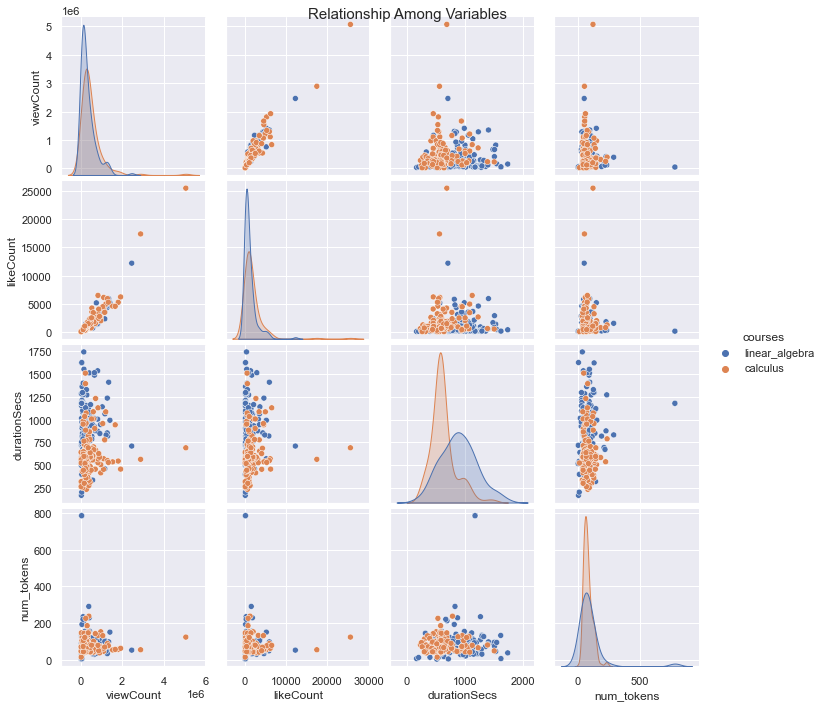

In [37]:
# A Pairplot of view count and like count along with years
# The variables are separated by colors assigned to each course
sns.pairplot(df_new, hue ='courses')
plt.suptitle("Relationship Among Variables", fontsize=15)
# to show
plt.show();

We can see from the pairplot the strong positive relationship between view and like counts. The other pairs, however, seem to have a weak relationship.

**5.2 Illustrating relationships between textual data along with attitudinal infomation**

<Figure size 1200x600 with 0 Axes>

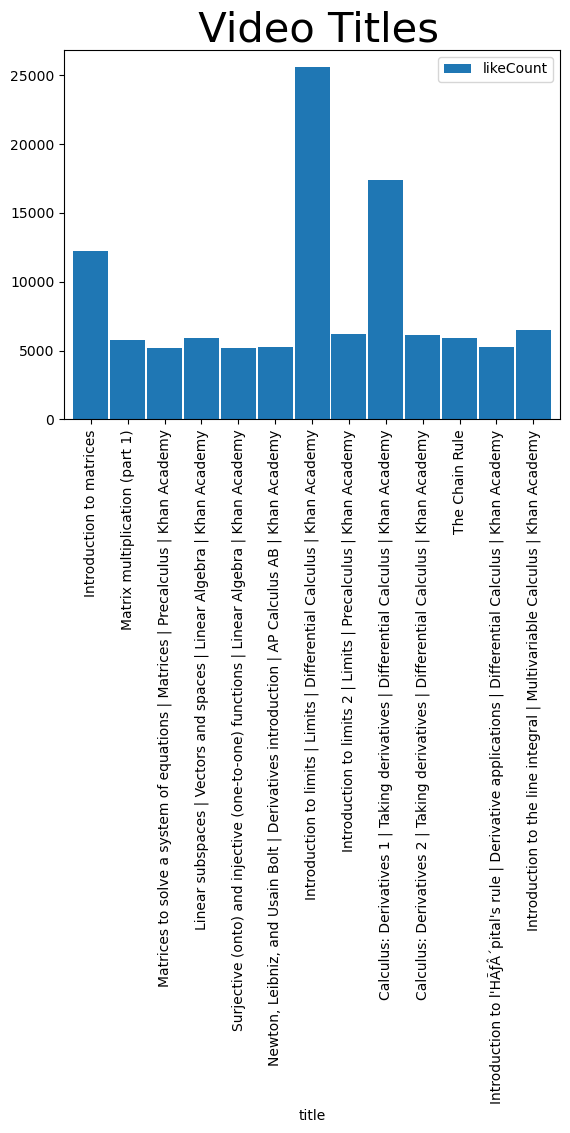

In [38]:
plt.style.use("default")
plt.figure(figsize=(12,6))
title_like = final_df.groupby(['title'])['likeCount'].transform('sum') > 5000
title_like = final_df[title_like]
title_like[['title', 'likeCount']].plot(kind='bar', x='title', y='likeCount', width=0.95)
plt.title(" Video Titles", fontsize=30);

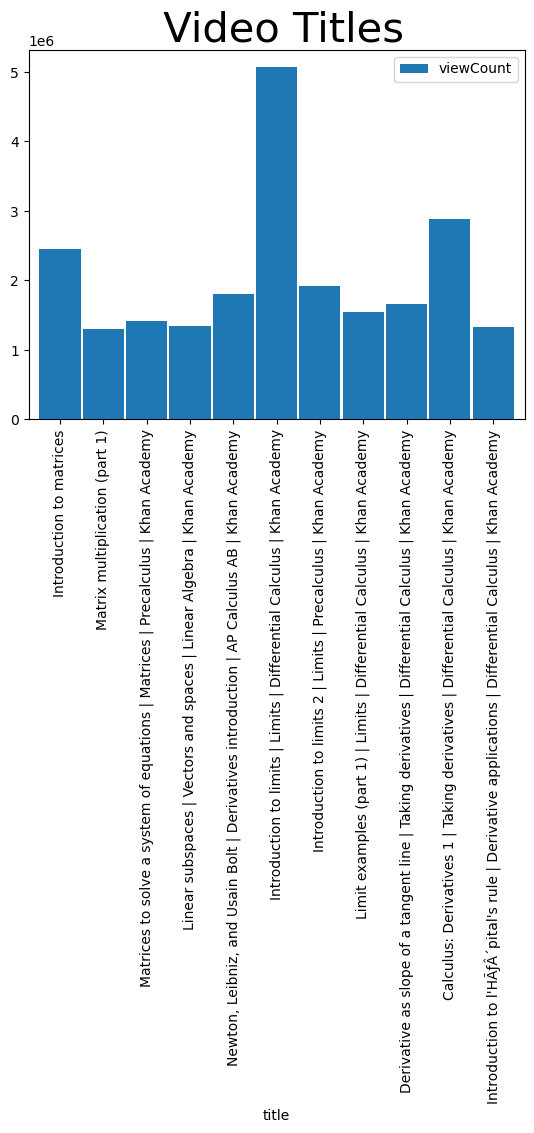

In [39]:
title_view = final_df.groupby(['title'])['viewCount'].transform('sum') > 1300000
title_view = final_df[title_view]
title_view[['title', 'viewCount']].plot(kind='bar',x='title', y='viewCount', width=0.95)
plt.title(" Video Titles", fontsize=30);

We can see from the bar charts that the top three most watched and liked videos are *Introduction to limits*, *Calculus: Derivatives 1* and *Introduction to matrices*, respectively. 

In [40]:
from collections import Counter

# Create a function to count tokens
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
        
     # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

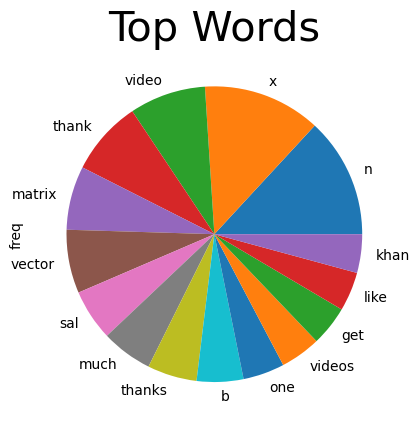

In [41]:
# A horizontal barchart of 15 top words
freq_df = count_words(final_df)
ax = freq_df.head(15).plot.pie(subplots=True, legend=False)
plt.title("Top Words", fontsize=30);

From the pie chart, we can see that three of the top words - *thank*, *thanks* and *like* - are positive, whereas the others are neutral. As a follow-up approach, it might be worthwhile exploring the sentiment surrounding *Sal* and *Khan*. This could provide a more nuanced understanding of viewers' opinion about the learning resources.

It is also worth noting that the token *like* as a verb or a noun has a positive sentiment, whereas it has a neutral sentiment as a preposition or an adverb.

# PHASE 6: ACT
In this section, we will delineate our findings from the business objective and provide suggestions on how to enact them.<br>

The following conclusions (or lack thereof) are supported from our findings:<br>
- The amount of likes for videos increases with more views.
- There seems to be a preference for shorter videos although this is inconclusive.
- Viewers also seem more interested in watching videos at the begining of a series/playlist. Perhaps this might be due to viewers gauging whether or not the conent is worthwhile.
- There seems to be positive enagement from viewers given the preponderence of positive sentiment. On a further note, given the frequent occurence of *Sal* and *Khan*, it might be worth viewing the seniment surrounding them.

Suggestions for actionable steps:<br>
- Keep videos short, which is supported by research [2].
- Extract positive user-generated comments for promoting learning resources (similar to customer testimonials).
- Explore keywords like 'Sal' and 'Khan' for revising instructional videos along with rebranding.
- Given the limited data we've collected here, it might be worthwhile to gather more varied data and put viewers into descriptive clusters (e.g., user profiles) to better understand their interactive behavior.

## References
[1]  C. Thompson, “How Khan Academy is changing the rules of education," Wired Mag., 126, 1–5, 
2011.<br> 
[2] S. Yassine, S. Kadry, and M.A. Sicilia, "Statistical profiles of users' interactions with videos in large repositories: Mining of Khan Academy Repository," KSII Transactions on Internet and Information Systems (TIIS), 14(5), 2101-2121, 2020.<br>
[3] T. L. Tuten and M. R. Solomon, *Social media marketing.* Sage, 2017.<br>
